In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
import tensorflow_datasets as tfds
print(tfds.__version__)

import pathlib

1.3.2


In [3]:
data_dir = "D:\\Data\\voc\\2007"
pathlib.Path(data_dir).mkdir(parents=True, exist_ok=True)

In [4]:
tfds.disable_progress_bar()

In [5]:
datasets, info = tfds.load("voc/2007", data_dir=data_dir, with_info=True)

In [6]:
info

tfds.core.DatasetInfo(
    name='voc',
    version=4.0.0,
    description='This dataset contains the data from the PASCAL Visual Object Classes Challenge
2007, a.k.a. VOC2007, corresponding to the Classification and Detection
competitions.
A total of 9963 images are included in this dataset, where each image
contains a set of objects, out of 20 different classes, making a total of
24640 annotated objects.
In the Classification competition, the goal is to predict the set of labels
contained in the image, while in the Detection competition the goal is to
predict the bounding box and label of each individual object.
annotations.
',
    homepage='http://host.robots.ox.ac.uk/pascal/VOC/voc2007/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'labels': Sequence(ClassLabel(shape=(), dtype=tf.int64, num_classes=20)),
        'labels_no_difficult': Sequence(ClassLabel(shape=(), dtype=

# Visualize data

In [7]:
ds_train = datasets['train']

In [13]:
num_train = info.splits['train'].num_examples
num_train

2501

In [69]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

In [116]:
int2str = info.features['labels'].int2str

def index_to_label(index):
    return int2str(index)

boxes: ymin, xmin, ymax, xmax. This is the default bounding boxes encoding in TensorFlow. In original dataset, it is left, top, ,right, bottom

In [264]:
def visualize_data(image, boxes, labels):
    """Visualize image with bound boxes and labels.
    The data encoding is from tf.data which is different from the original dataset.
    boxes: ymin, xmin, ymax, xmax. This is the default bounding boxes encoding in TensorFlow. 
    In original dataset, it is left, top, ,right, bottom
    
    Args:
        image: image, (width, height, 3)
        boxes: (num_boxes, 4) - ymin, xmin, ymax, xmax
        labels: (num_boxes, )
    """
    fig, ax = plt.subplots(1)
    
    ax.imshow(image)
    h, w, _ = image.shape
    edgecolor = (1., 0., 0.)
    for i, box in enumerate(boxes):
        if isinstance(box, tf.Tensor):
            box = box.numpy()
        ymin, xmin, ymax, xmax = box[0], box[1], box[2], box[3]
        xmin, xmax = xmin * w, xmax * w
        ymin, ymax = ymin * h, ymax * h
        cls_name = index_to_label(labels[i])
        ax.add_patch(patches.Rectangle(
            (xmin, ymin),  xmax - xmin, ymax - ymin,
            linewidth=2, edgecolor=edgecolor,
            facecolor="none"))
        plt.text(xmin, ymin, s=cls_name, color="white", 
                 verticalalignment="top", 
                 bbox={"color": edgecolor, "pad": 0})
    plt.axis("off")
    plt.show()

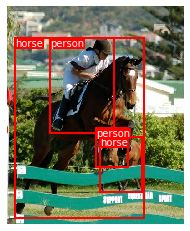

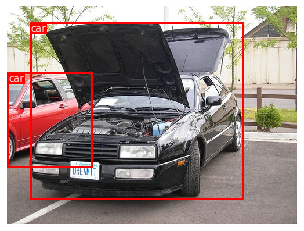

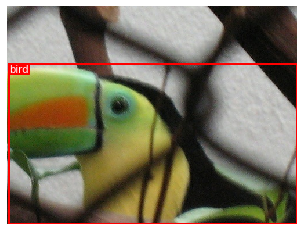

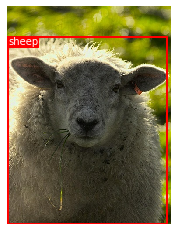

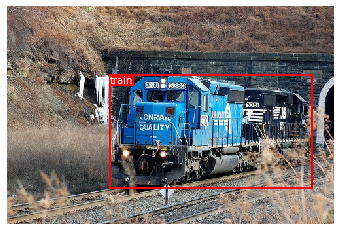

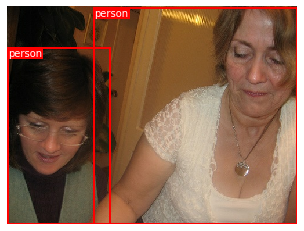

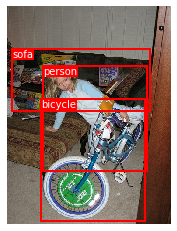

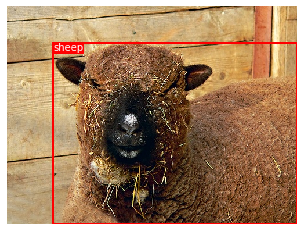

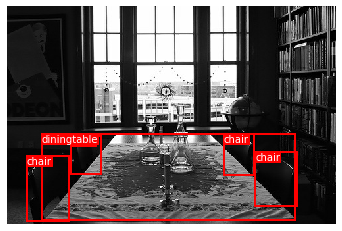

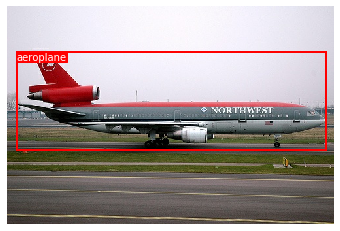

In [265]:
image = None
for data in ds_train.take(10):
    image = data['image']
    filename = data['image/filename']
    labels = data['labels']
    labels_no_difficult = data['labels_no_difficult']
    objects = data['objects']
    
    visualize_data(image, objects['bbox'], objects['label'])